A) Preprocessing Data

First 5 rows of the dataset:
    Age    Income Education Level Loan Default
0  53.0   72392.0     High School          Yes
1  36.0   53551.0     High School           No
2  19.0   63233.0        Master's          Yes
3  53.0   67866.0      Bachelor's           No
4  18.0  106311.0     High School          Yes

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              49 non-null     float64
 1   Income           48 non-null     float64
 2   Education Level  45 non-null     object 
 3   Loan Default     50 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.7+ KB
None

Summary Statistics:
             Age         Income
count  49.000000      48.000000
mean   44.204082   72311.541667
std    13.967193   25995.132451
min    18.000000   24195.000000
25%    35.000000   50522.750000
50%    43.000000   72683.0

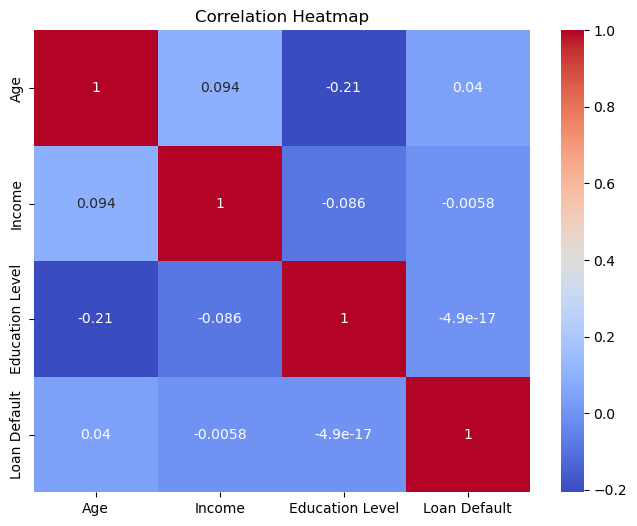

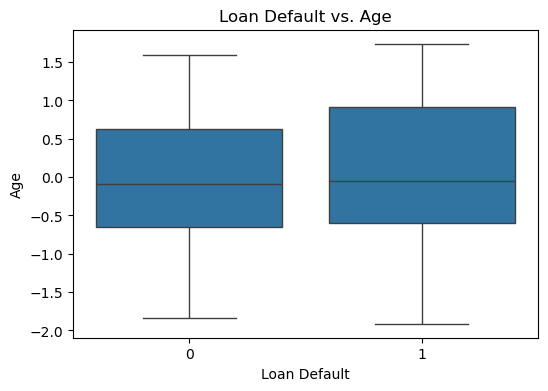

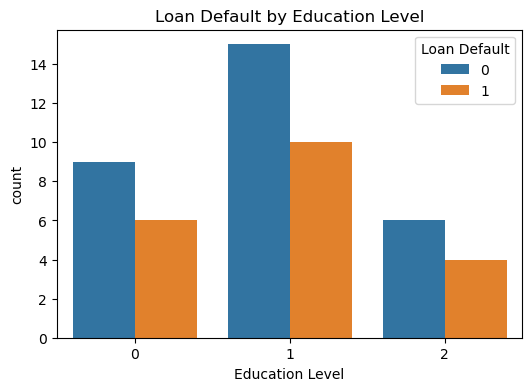

Shapes of Train/Test Splits:
X_train: (40, 3)
X_test: (10, 3)
y_train: (40,)
y_test: (10,)
Preprocessed dataset saved as 'preprocessed_loan_dataset.csv'.


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("loan_dataset.csv")

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values Before Imputation:")
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())

df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])

print("\nMissing Values After Imputation:")
print(df.isnull().sum())

encoder = LabelEncoder()
df['Education Level'] = encoder.fit_transform(df['Education Level'])

df['Loan Default'] = df['Loan Default'].map({'Yes': 1, 'No': 0})

print("\nDataset After Encoding:")
print(df.head())

scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

print("\nDataset After Scaling:")
print(df.head())

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan Default', y='Age', data=df)
plt.title("Loan Default vs. Age")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Education Level', hue='Loan Default', data=df)
plt.title("Loan Default by Education Level")
plt.show()

from sklearn.model_selection import train_test_split

X = df.drop('Loan Default', axis=1)
y = df['Loan Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of Train/Test Splits:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

df.to_csv("preprocessed_loan_dataset.csv", index=False)
print("Preprocessed dataset saved as 'preprocessed_loan_dataset.csv'.")

B) Decision Tree Algorithm

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.25      0.33      0.29         3

    accuracy                           0.50        10
   macro avg       0.46      0.45      0.45        10
weighted avg       0.54      0.50      0.52        10

Confusion Matrix:
 [[4 3]
 [2 1]]


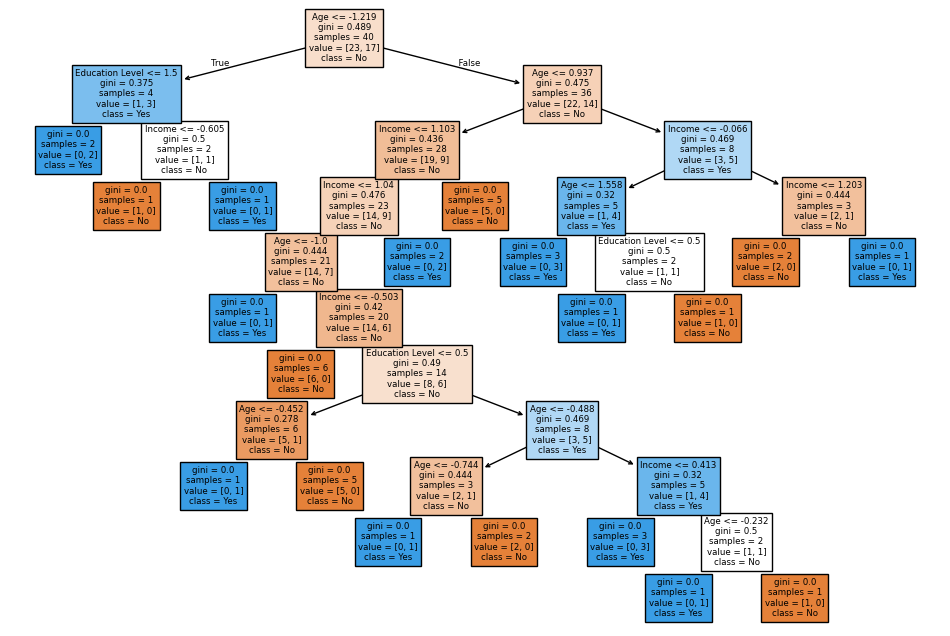

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('preprocessed_loan_dataset.csv')

X = df[['Age', 'Income', 'Education Level']]  # Features
y = df['Loan Default']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Age', 'Income', 'Education Level'], class_names=['No', 'Yes'], filled=True)
plt.show()


C)  Accuracy Measurement

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

data = pd.read_csv('loan_dataset.csv') 

print("Dataset Information:")
print(data.info())
print("\nFirst few rows of data:")
print(data.head())

imputer = SimpleImputer(strategy='median')  
data['Income'] = imputer.fit_transform(data[['Income']])

data['Education Level'] = data['Education Level'].fillna(data['Education Level'].mode()[0])

data['Loan Default'] = data['Loan Default'].map({'Yes': 1, 'No': 0})

education_mapping = {'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2}
data['Education Level'] = data['Education Level'].map(education_mapping)

X = data.drop('Loan Default', axis=1)  
y = data['Loan Default']

X_imputer = SimpleImputer(strategy='median')
X = X_imputer.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the model:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClass distribution in y_train (before SMOTE):", np.bincount(y_train))
print("Class distribution in y_train (after SMOTE):", np.bincount(y_train_resampled))

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              49 non-null     float64
 1   Income           48 non-null     float64
 2   Education Level  45 non-null     object 
 3   Loan Default     50 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.7+ KB
None

First few rows of data:
    Age    Income Education Level Loan Default
0  53.0   72392.0     High School          Yes
1  36.0   53551.0     High School           No
2  19.0   63233.0        Master's          Yes
3  53.0   67866.0      Bachelor's           No
4  18.0  106311.0     High School          Yes

Accuracy of the model: 0.4

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.29      0.33      0.31         6

    accuracy         